In [223]:
from systems.parse import parse
from systems.viz import as_dot
from IPython.core.display import HTML, display_html
import pandas as pd
import matplotlib.pyplot as plt

In [224]:


def model_refactoring(domain_developers_percentage, friction_from_domain_work_rate):
    args = pd.DataFrame([{
        "domain_developers_percentage": domain_developers_percentage,
        "friction_from_domain_work_rate": friction_from_domain_work_rate
    }])
    print(args.to_string(index=False))
    
    total_developers_count = 500
    domain_developers = int(domain_developers_percentage * total_developers_count)
    flow_developers = int(total_developers_count - domain_developers)
    rounds = 300

    spec = """

    [Funding] > Developers({total_developers_count}) @ {total_developers_count}
    Developers > IdealDomainWork @ {domain_developers}
    Developers > FlowWork @ {flow_developers}

    IdealDomainWork         > [Sink] @ Conversion(1)
    [calculateDomainWork]   > DomainWork @ (IdealDomainWork - Friction)
    DomainWork              > TotalValue @ Conversion(0.05)
    FlowWork                > [Sink2] @ Conversion(1)
    
    Refactoring             > [Sink3] @ Conversion(1)
    [Refactor]              > Refactoring(0, Friction) @ (FlowWork / Developers * Friction)
    
    [WorkFriction]          > Friction @ (DomainWork * {friction_from_domain_work_rate} - Refactoring)


    """.format(total_developers_count=total_developers_count, domain_developers=domain_developers, flow_developers=flow_developers, friction_from_domain_work_rate=friction_from_domain_work_rate)
    # print(spec)
    model = parse(spec)

    results = model.run(rounds=rounds)
    df = pd.DataFrame.from_records(results)

    result = df
    table = pd.concat([result.head(5), result.tail(5)])
    table = table[['IdealDomainWork', 'FlowWork', 'IdealDomainWork', 'DomainWork', 'Friction', 'TotalValue', 'Refactoring']]
    display_html(table)
    df[['IdealDomainWork', 'FlowWork', 'IdealDomainWork', 'DomainWork', 'TotalValue']].plot(figsize=(24, 4))
    plt.show()
    

 domain_developers_percentage  friction_from_domain_work_rate
                            1                            0.01


,IdealDomainWork,FlowWork,IdealDomainWork,DomainWork,Friction,TotalValue,Refactoring
0,0,0,0,0.000000,0.000000,0,0
1,500,0,500,0.000000,0.000000,0,0
2,500,0,500,500.000000,0.000000,0,0
3,500,0,500,500.000000,5.000000,25,0
4,500,0,500,495.000000,10.000000,50,0
296,500,0,500,25.527574,474.730307,2227,0
297,500,0,500,25.269693,474.985583,2228,0
298,500,0,500,25.014417,475.238280,2229,0
299,500,0,500,24.761720,475.488424,2230,0
300,500,0,500,24.511576,475.736041,2231,0


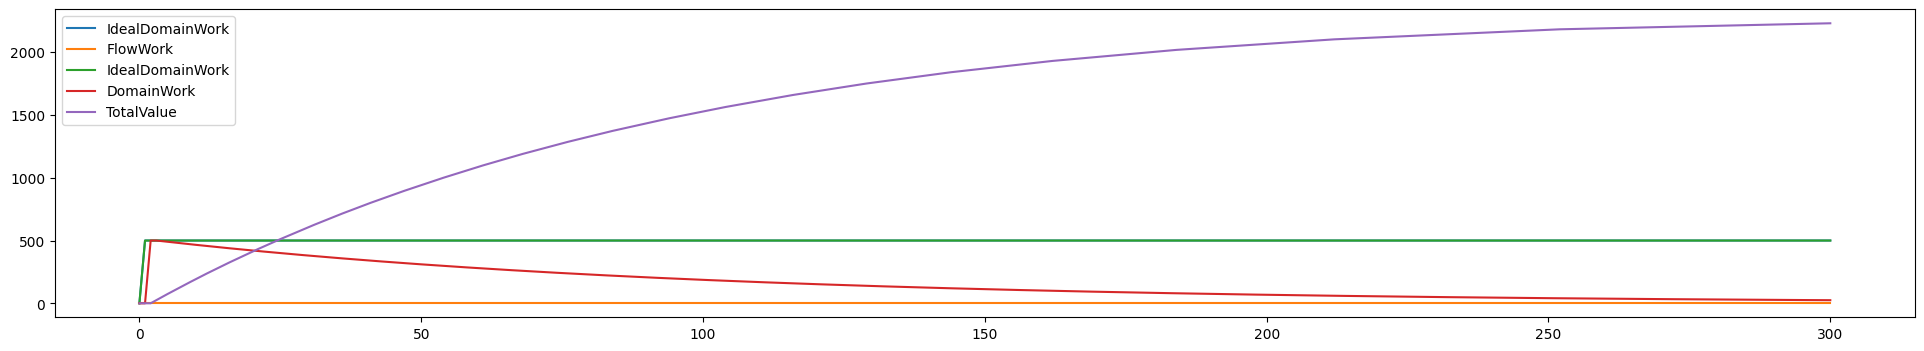

 domain_developers_percentage  friction_from_domain_work_rate
                            1                            0.02


,IdealDomainWork,FlowWork,IdealDomainWork,DomainWork,Friction,TotalValue,Refactoring
0,0,0,0,0.00000,0.000000,0,0
1,500,0,500,0.00000,0.000000,0,0
2,500,0,500,500.00000,0.000000,0,0
3,500,0,500,500.00000,10.000000,25,0
4,500,0,500,490.00000,20.000000,50,0
296,500,0,500,18.76882,530.409553,1145,0
297,500,0,500,18.76882,530.784929,1145,0
298,500,0,500,18.76882,531.160305,1145,0
299,500,0,500,18.76882,531.535682,1145,0
300,500,0,500,18.76882,531.911058,1145,0


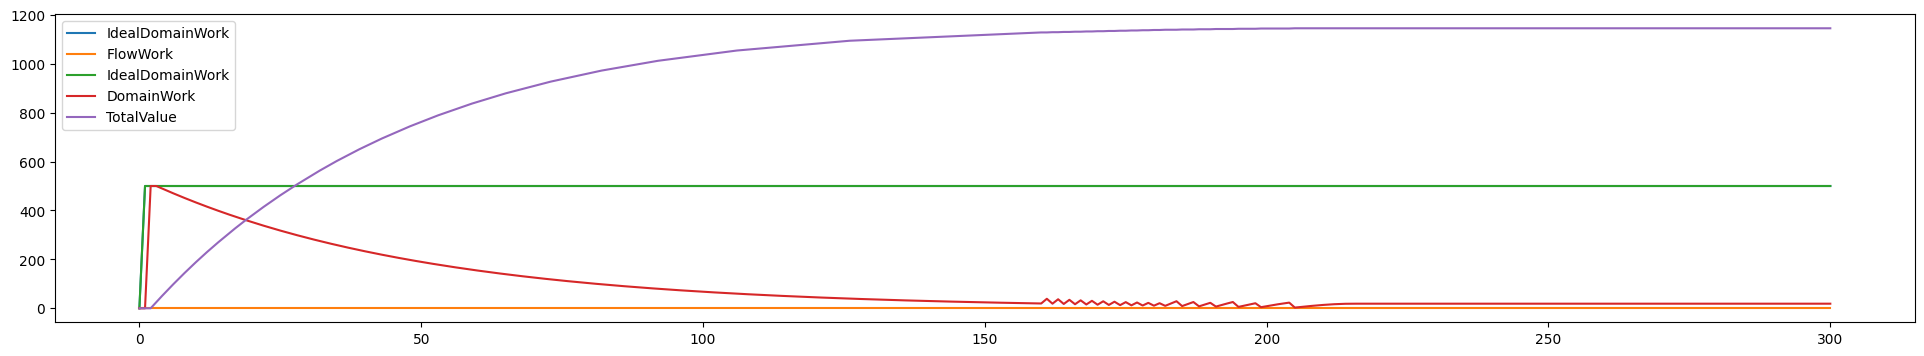

 domain_developers_percentage  friction_from_domain_work_rate
                         0.95                            0.05


,IdealDomainWork,FlowWork,IdealDomainWork,DomainWork,Friction,TotalValue,Refactoring
0,0,0,0,0.00,0.00,0,0.0000
1,475,25,475,0.00,0.00,0,0.0000
2,475,25,475,475.00,0.00,0,0.0000
3,475,25,475,475.00,23.75,23,0.0000
4,475,25,475,451.25,47.50,46,1.1875
296,475,25,475,237.50,237.50,3370,11.8750
297,475,25,475,237.50,237.50,3381,11.8750
298,475,25,475,237.50,237.50,3392,11.8750
299,475,25,475,237.50,237.50,3403,11.8750
300,475,25,475,237.50,237.50,3414,11.8750


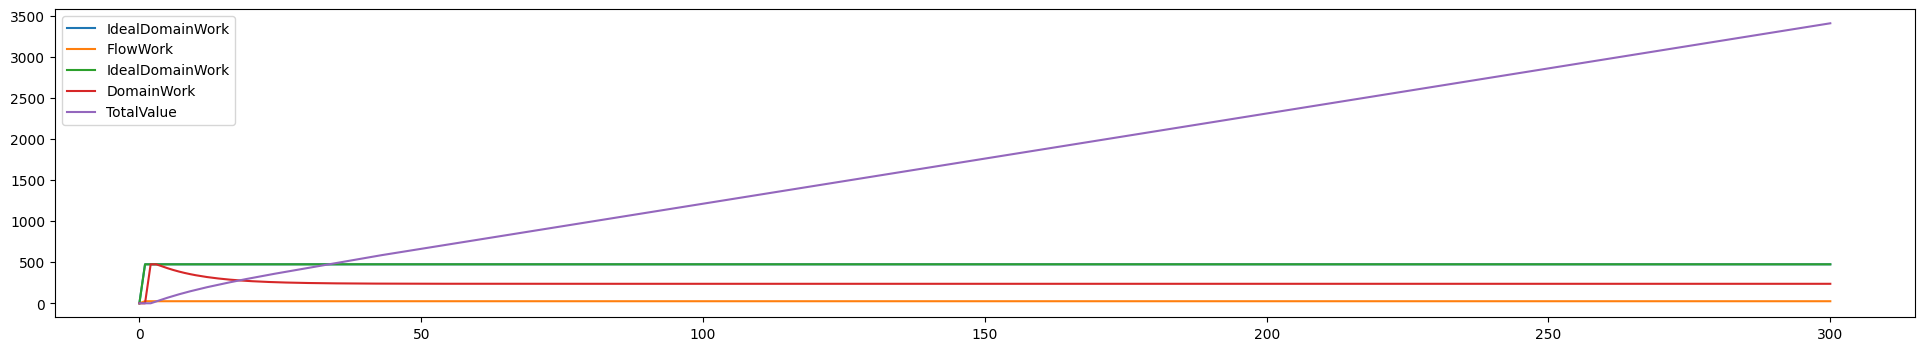

 domain_developers_percentage  friction_from_domain_work_rate
                          0.8                            0.05


,IdealDomainWork,FlowWork,IdealDomainWork,DomainWork,Friction,TotalValue,Refactoring
0,0,0,0,0.0,0.0,0,0.0
1,400,100,400,0.0,0.0,0,0.0
2,400,100,400,400.0,0.0,0,0.0
3,400,100,400,400.0,20.0,20,0.0
4,400,100,400,380.0,40.0,40,4.0
296,400,100,400,320.0,80.0,4718,16.0
297,400,100,400,320.0,80.0,4734,16.0
298,400,100,400,320.0,80.0,4750,16.0
299,400,100,400,320.0,80.0,4766,16.0
300,400,100,400,320.0,80.0,4782,16.0


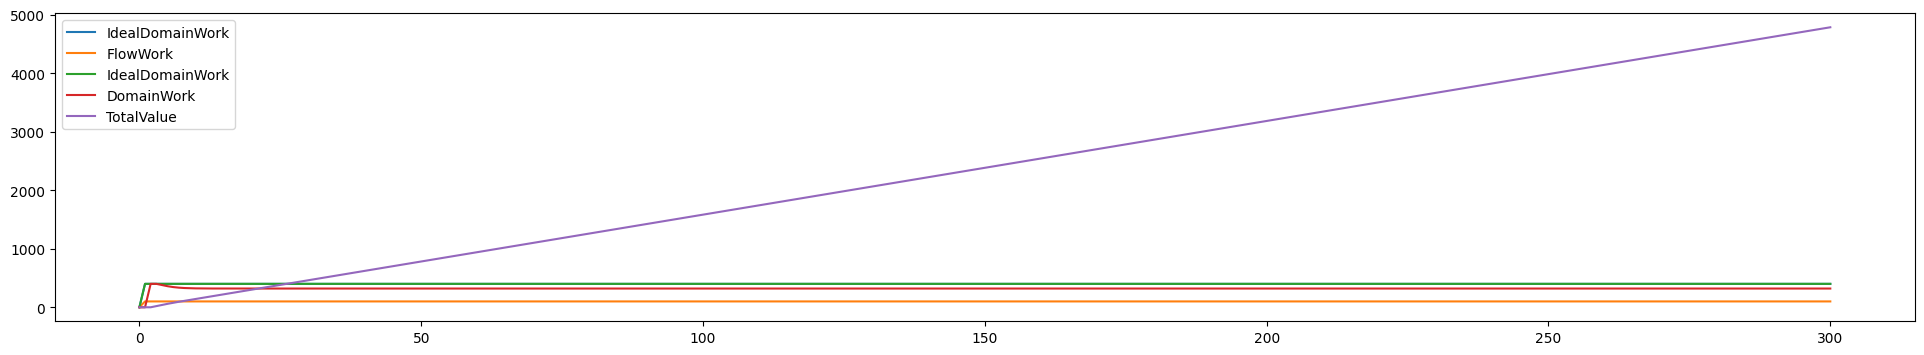

 domain_developers_percentage  friction_from_domain_work_rate
                          0.5                            0.05


,IdealDomainWork,FlowWork,IdealDomainWork,DomainWork,Friction,TotalValue,Refactoring
0,0,0,0,0.000,0.000,0,0.0000
1,250,250,250,0.000,0.000,0,0.0000
2,250,250,250,250.000,0.000,0,0.0000
3,250,250,250,250.000,12.500,12,0.0000
4,250,250,250,237.500,25.000,24,6.2500
296,250,250,250,219.375,30.625,2946,15.3125
297,250,250,250,219.375,30.625,2956,15.3125
298,250,250,250,219.375,30.625,2966,15.3125
299,250,250,250,219.375,30.625,2976,15.3125
300,250,250,250,219.375,30.625,2986,15.3125


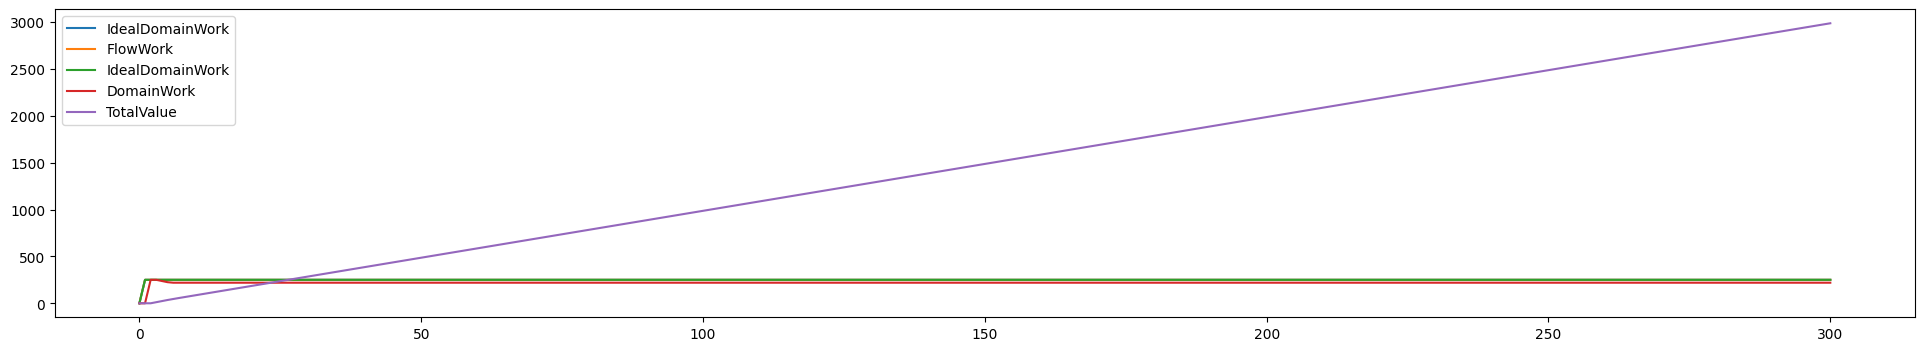

In [225]:
param_sets = [[1, 0.01], [1, 0.02], [0.95, 0.05], [0.8, 0.05], [0.5, 0.05]]
x = [model_refactoring(param_set[0], param_set[1]) for param_set in param_sets]